In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import struct
import os
import xarray as xr
import glob
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns

In [2]:
# General plotting settings
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [3]:
# Load in Obs
data_dir = r'/home/disk/sipn/nicway/data/obs/'
da_51 = xr.open_dataarray(os.path.join(data_dir, 'NSIDC_0051/SIC_nc/NSIDC_0051.nc'))
da_79 = xr.open_dataarray(os.path.join(data_dir, 'NSIDC_0079/SIC_nc/NSIDC_0079.nc'))
da_81 = xr.open_dataarray(os.path.join(data_dir, 'NSIDC_0081/SIC_nc/NSIDC_0081.nc'))

In [4]:
# Load in Model
ds_gfdl_flor = xr.open_dataset('/home/disk/sipn/nicway/data/model/nmme/GFDL_FLORB01/hist/stereo/GFDL_FLORB01_Stereo.nc')

In [5]:
da_81

<xarray.DataArray (time: 1138, y: 448, x: 304)>
[154986496 values with dtype=float64]
Coordinates:
  * x        (x) int64 -3850000 -3825000 -3800000 -3775000 -3750000 -3725000 ...
  * y        (y) int64 5850000 5825000 5800000 5775000 5750000 5725000 ...
  * time     (time) datetime64[ns] 2015-01-01 2015-01-02 2015-01-03 ...
    lat      (x, y) float64 ...
    lon      (x, y) float64 ...

In [6]:
ds_gfdl_flor

<xarray.Dataset>
Dimensions:    (ensemble: 12, fore_time: 12, init_time: 83, x: 448, y: 304)
Coordinates:
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * init_time  (init_time) datetime64[ns] 1980-01-16T12:00:00 ...
  * fore_time  (fore_time) int64 15 45 75 105 135 165 195 225 255 285 315 345
Dimensions without coordinates: x, y
Data variables:
    sic        (ensemble, init_time, fore_time, y, x) float64 ...

In [7]:
# Aggregate over domain
da_51_avg = da_51.sum(dim='x').sum(dim='y')*(25*25)/(10**6)
da_79_avg = da_79.sum(dim='x').sum(dim='y')*(25*25)/(10**6)
da_81_avg = da_81.sum(dim='x').sum(dim='y')*(25*25)/(10**6)

ds_gfdl_flor_avg = ds_gfdl_flor.sum(dim='x').sum(dim='y')*(25*25)/(10**6)

/home/disk/sipn/nicway/anaconda3/envs/xesmf/lib/python3.6/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


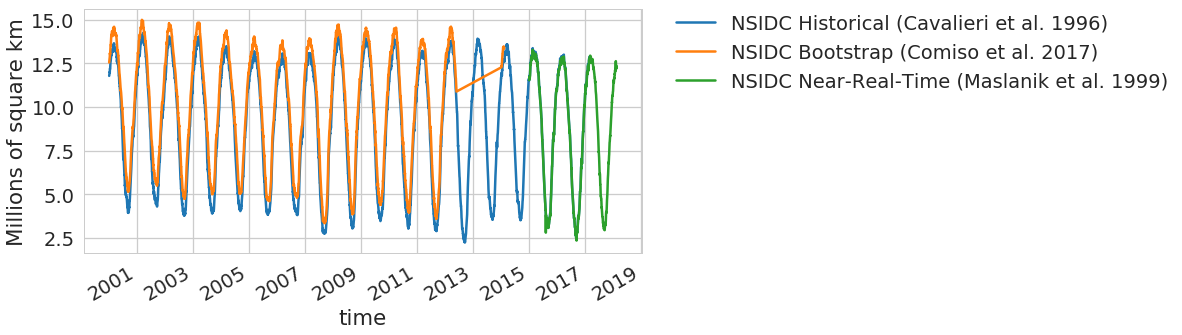

In [8]:
# Plot pan-Arctic sea ice extent
plt.figure(figsize=(10,5))
da_51_avg.plot(label='NSIDC Historical (Cavalieri et al. 1996)')
da_79_avg.plot(label='NSIDC Bootstrap (Comiso et al. 2017)')
da_81_avg.plot(label='NSIDC Near-Real-Time (Maslanik et al. 1999)')
plt.ylabel('Millions of square km')
plt.legend(bbox_to_anchor=(1.03, 1.05))